In [1]:
import pandas as pd
import numpy as np
from skimage import img_as_float
from skimage.io import imread, imsave
from sklearn.cluster import KMeans
import pylab
import math

Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

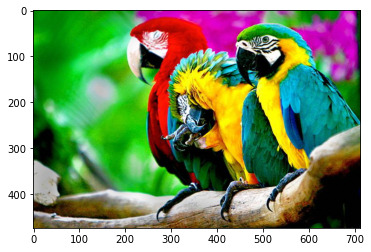

In [2]:
image = img_as_float(imread('parrots.jpg'))
pylab.imshow(image);

Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [3]:
w, h, d = image.shape
pixels = pd.DataFrame(np.reshape(image, (w * h, d)), columns=['R', 'G', 'B'])
pixels.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [4]:
model = KMeans(init='k-means++', random_state=241)
model.fit(pixels)
pixels['cluster'] = model.predict(pixels)

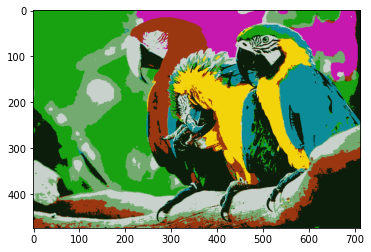

In [5]:
means = pixels.groupby('cluster').mean().values
mean_pixels = [means[x] for x in pixels['cluster']]
mean_image = np.reshape(mean_pixels, (w, h, d))
pylab.imshow(mean_image);

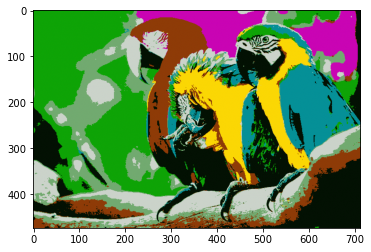

In [6]:
medians = pixels.groupby('cluster').median().values
medians_pixels = [medians[x] for x in pixels['cluster']]
medians_image = np.reshape(medians_pixels, (w, h, d))
pylab.imshow(medians_image);

Измерьте качество получившейся сегментации с помощью метрики PSNR

In [7]:
def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)   
    return 10 * math.log10(float(1) / mse)

psnr(image, medians_image), psnr(image, mean_image)

(18.142797115302557, 18.436785916927267)

Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

In [8]:
for n_clusters in range (2,20):
    model = KMeans(n_clusters = n_clusters, init='k-means++', random_state=241)
    model.fit(pixels)
    pixels['cluster'] = model.predict(pixels)

    means = pixels.groupby('cluster').mean().values
    mean_pixels = [means[x] for x in pixels['cluster']]
    mean_image = np.reshape(mean_pixels, (w, h, d))

    medians = pixels.groupby('cluster').median().values
    medians_pixels = [medians[x] for x in pixels['cluster']]
    medians_image = np.reshape(medians_pixels, (w, h, d))

    if psnr(image, medians_image) >= 20 or psnr(image, mean_image) >= 20:
        print(n_clusters)
        break

12
